In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
cancer = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\breast-cancer-unsupervised-ad.csv",header = None)

In [5]:
cancer

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,n
363,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,n
364,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,n
365,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,n


In [6]:
shuffled_df = cancer.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)


11


In [7]:
pca = PCA(n_components=11)
new_df = pca.fit_transform(df)
new_df
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.267179,-7.170568,-0.358326,-2.742403,-0.538049,-0.643393,0.240709,-0.012608,-0.460040,-2.201469,-0.187307
1,-2.874060,0.568791,3.564727,0.208875,1.551718,0.318602,-0.360277,0.698914,1.187094,1.118105,-0.001299
2,-3.424810,0.839886,1.190319,0.420830,0.012740,0.787378,0.219091,0.806917,0.004493,0.101408,0.360119
3,-2.365432,0.999482,1.332281,-2.252773,-2.066493,-0.958727,-0.768225,0.288723,0.005551,-1.212776,-0.826435
4,0.632375,0.467090,0.276990,0.236747,-1.302241,-0.676926,-0.261886,-0.858041,-0.662088,-0.426694,-0.011824
...,...,...,...,...,...,...,...,...,...,...,...
362,0.806783,-0.996261,0.464583,-0.993417,-0.758623,-2.165083,0.348796,0.770132,0.097609,-0.414396,-0.018852
363,-1.922478,2.154437,-1.689200,-0.500795,0.380599,0.429873,0.087757,0.202887,-0.254949,-0.509187,0.222345
364,5.979952,-6.855252,-2.032387,3.610594,-0.315307,-1.985697,0.659443,0.206570,-2.499779,1.857263,-0.138794
365,2.135750,3.142213,-0.767074,-0.287211,-1.026901,0.000302,-0.383242,0.179175,-0.422853,-0.165520,-0.359497


In [8]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [9]:
lof = LOF()

cof = COF()

cblof = CBLOF()

knn = KNN()

lof.fit(df)

cof.fit(df)

knn.fit(df)

cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [10]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,30
0,0
1,0
2,0
3,0
4,0
...,...
362,0
363,0
364,0
365,0


In [11]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

knn_pred = knn.labels_
knn_scores = knn.decision_scores_

cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

cof_pred = cof.labels_
cof_scores = cof.decision_scores_

In [12]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.9264305177111717


In [13]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.9264305177111717


In [14]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.9155313351498637


In [15]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.9264305177111717


F1-score: 0.43
ROC AUC: 0.99


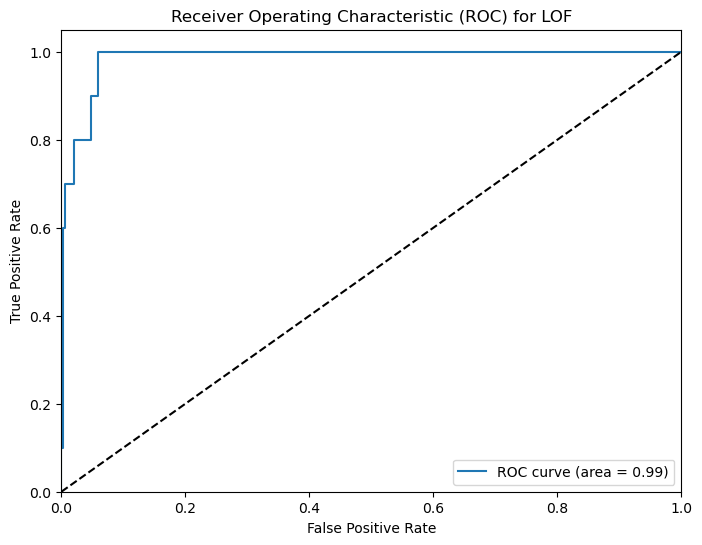

In [16]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)

plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

0.9264305177111717
F1: 0.43
ROC AUC: 0.98


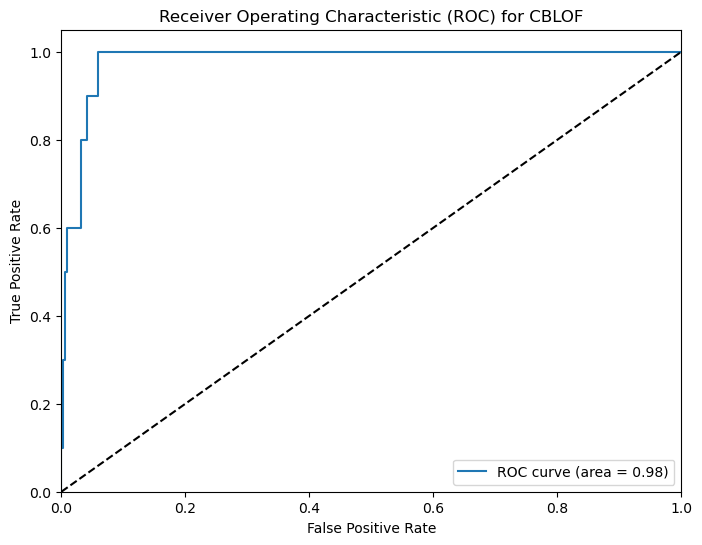

In [17]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

0.9264305177111717
F1: 0.43
ROC AUC: 0.98


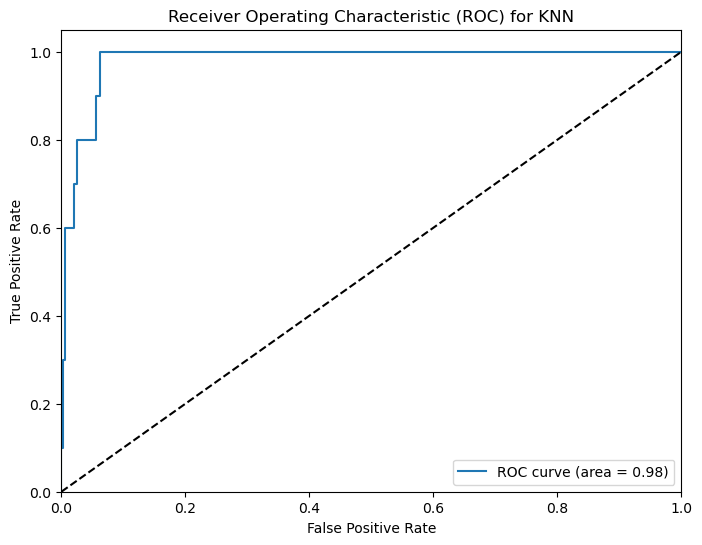

In [19]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

0.9155313351498637
F1-score: 0.34
ROC AUC: 0.96


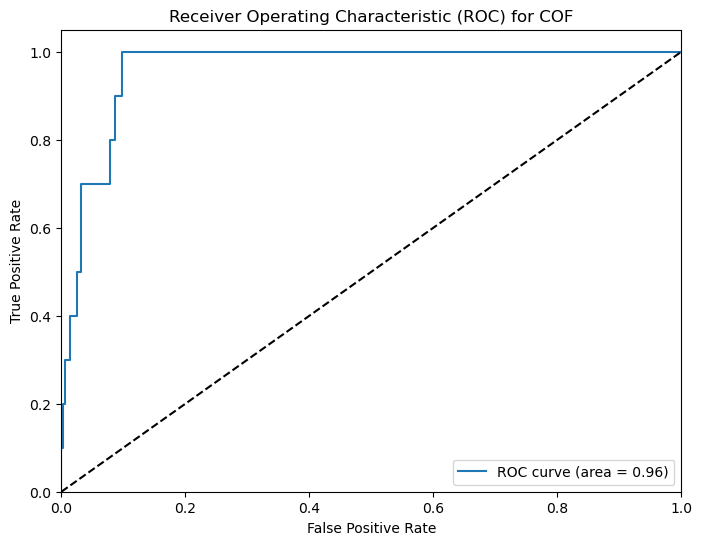

In [20]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

cof_f1 = f1_score(y, cof_pred)
print(f"F1-score: {cof_f1:.2f}")

roc_auc = roc_auc_score(y, cof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cof_fpr, cof_tpr, _ = roc_curve(y, cof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cof_fpr, cof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for COF')
plt.legend(loc="lower right")
plt.show()

Performance over multiple parameters

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score


c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

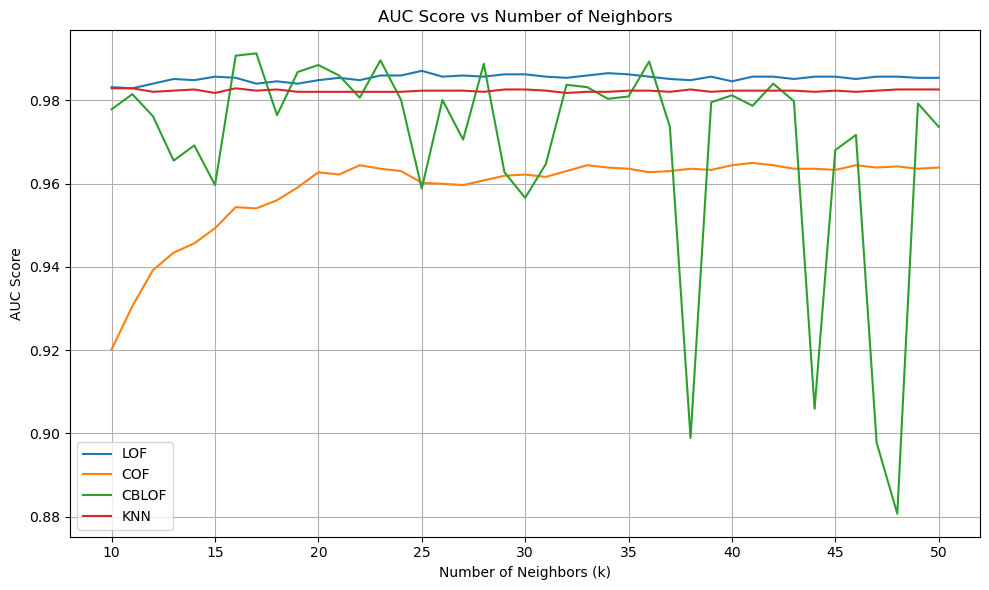

In [22]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []

precision_scores_lof = []
recall_scores_lof = []
f1_scores_lof = []


precision_scores_cblof = []
recall_scores_cblof = []
f1_scores_cblof = []

precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []

precision_scores_cof = []
recall_scores_cof = []
f1_scores_cof = []

n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    y_pred_lof = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)
    precision_lof = precision_score(y, y_pred_lof)
    recall_lof = recall_score(y, y_pred_lof)
    f1_lof = f1_score(y, y_pred_lof)
    precision_scores_lof.append(precision_lof)
    recall_scores_lof.append(recall_lof)
    f1_scores_lof.append(f1_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    y_pred_cof = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)
    auc_scores_cof.append(auc_cof)
    precision_cof = precision_score(y, y_pred_cof)
    recall_cof = recall_score(y, y_pred_cof)
    f1_cof = f1_score(y, y_pred_cof)
    precision_scores_cof.append(precision_cof)
    recall_scores_cof.append(recall_cof)
    f1_scores_cof.append(f1_cof)

    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_pred_cblof = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    precision_cblof = precision_score(y, y_pred_cblof)
    recall_cblof = recall_score(y, y_pred_cblof)
    f1_cblof = f1_score(y, y_pred_cblof)
    precision_scores_cblof.append(precision_cblof)
    recall_scores_cblof.append(recall_cblof)
    f1_scores_cblof.append(f1_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    y_pred_knn = knn_model.labels_
    precision_knn = precision_score(y, y_pred_knn)
    recall_knn = recall_score(y, y_pred_knn)
    f1_knn = f1_score(y, y_pred_knn)
    precision_scores_knn.append(precision_knn)
    recall_scores_knn.append(recall_knn)
    f1_scores_knn.append(f1_knn)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_precision_lof = np.mean(precision_scores_lof)
mean_recall_lof = np.mean(recall_scores_lof)
mean_f1_lof = np.mean(f1_scores_lof)
mean_precision_cblof = np.mean(precision_scores_cblof)
mean_recall_cblof = np.mean(recall_scores_cblof)
mean_f1_cblof = np.mean(f1_scores_cblof)
mean_precision_knn = np.mean(precision_scores_knn)
mean_recall_knn = np.mean(recall_scores_knn)
mean_f1_knn = np.mean(f1_scores_knn)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

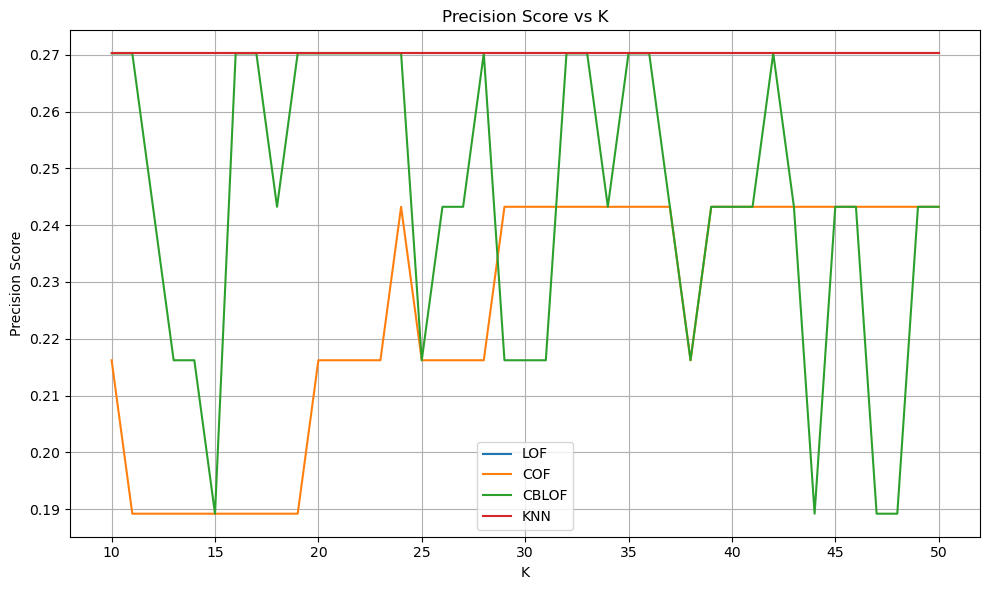

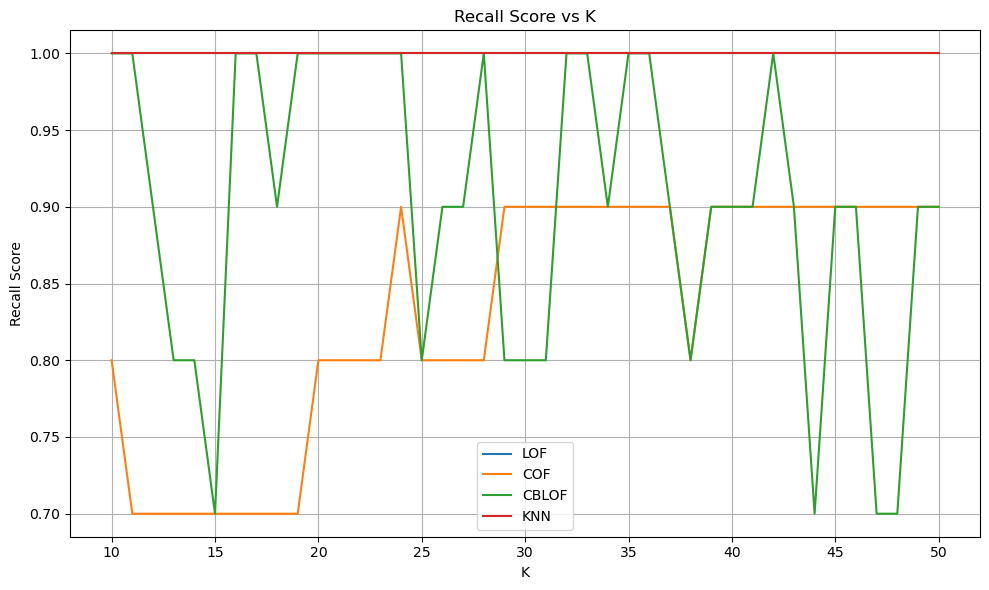

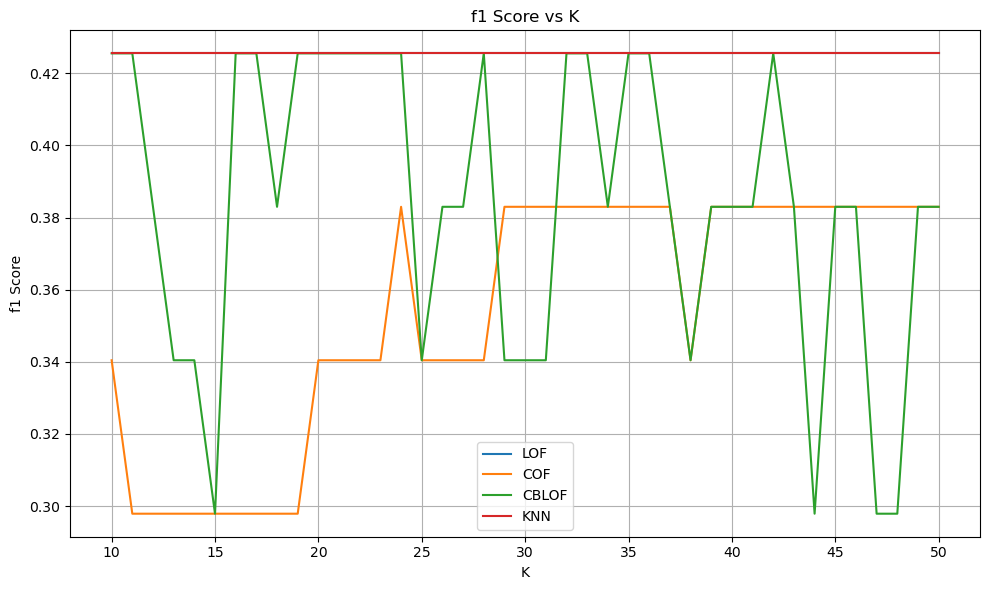

Mean Precision for LOF: 0.2703
Mean Recall for LOF: 1.0000
Mean F1 Score for LOF: 0.4255
Mean Precision for CBLOF: 0.2439
Mean Recall for CBLOF: 0.9024
Mean F1 Score for CBLOF: 0.3840
Mean Precision for KNN: 0.2703
Mean Recall for KNN: 1.0000
Mean F1 Score for KNN: 0.4255
Mean Precision for COF: 0.2248
Mean Recall for COF: 0.8317
Mean F1 Score for COF: 0.3539


In [27]:
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, precision_scores_lof, label='LOF')

plt.plot(n_neighbors_list, precision_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, precision_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, precision_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Precision Score')
plt.title('Precision Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, recall_scores_lof, label='LOF')

plt.plot(n_neighbors_list, recall_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, recall_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, recall_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Recall Score')
plt.title('Recall Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, f1_scores_lof, label='LOF')

plt.plot(n_neighbors_list, f1_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, f1_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, f1_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('f1 Score')
plt.title('f1 Score vs K')
plt.legend()

mean_precision_cof = np.mean(precision_scores_cof)
mean_recall_cof = np.mean(recall_scores_cof)
mean_f1_cof = np.mean(f1_scores_cof)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Mean Precision for LOF: {mean_precision_lof:.4f}")
print(f"Mean Recall for LOF: {mean_recall_lof:.4f}")
print(f"Mean F1 Score for LOF: {mean_f1_lof:.4f}")

print(f"Mean Precision for CBLOF: {mean_precision_cblof:.4f}")
print(f"Mean Recall for CBLOF: {mean_recall_cblof:.4f}")
print(f"Mean F1 Score for CBLOF: {mean_f1_cblof:.4f}")

print(f"Mean Precision for KNN: {mean_precision_knn:.4f}")
print(f"Mean Recall for KNN: {mean_recall_knn:.4f}")
print(f"Mean F1 Score for KNN: {mean_f1_knn:.4f}")

print(f"Mean Precision for COF: {mean_precision_cof:.4f}")
print(f"Mean Recall for COF: {mean_recall_cof:.4f}")
print(f"Mean F1 Score for COF: {mean_f1_cof:.4f}")

In [25]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])

cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])

knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])

cof_emmv = emmv_scores(cof,df)
print('cof emmv',cof_emmv['em'])


lof emmv 0.005023024523160762
cblof emmv 0.005023024523160762
knn emmv 0.005023024523160762
cof emmv 0.16963181178855585


In [26]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)


KNN auc 0.9823256131720979
LOF auc 0.9853590216574434
CBLOF auc 0.9695907631345221
COF auc 0.958680057388809
